### In this notebook we will use OSMNx and the Neo4j Python driver to import data from OpenStreetMap into Neo4j.

All details at https://github.com/johnymontana/openstreetmap-routing-web-app-workshop/blob/main/notebooks/01-import.ipynb

![Data Model](../../../img/data_model.png)

In [1]:
import neo4j
import osmnx as ox

In [2]:
NEO4J_URI = "bolt://localhost:7687"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "Itinary1"

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

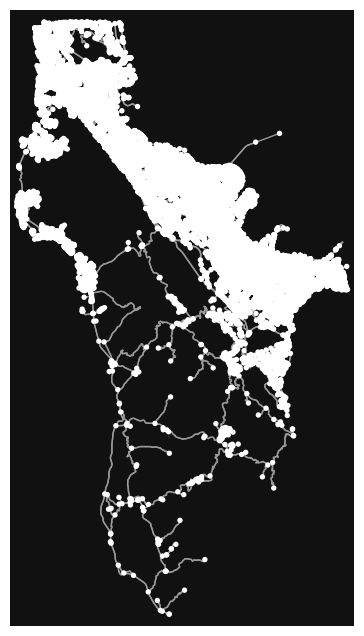

In [3]:
# Search OpenStreetMap and create a OSMNx graph

G = ox.graph_from_place("San Mateo, CA, USA", network_type="drive")

fig, ax = ox.plot_graph(G)

In [4]:
# Our road network graph can be represented as two GeoDataFrames

gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)


,osmid,y,x,ref,highway,street_count,geometry
0,281266,37.560184,-122.302578,414B,motorway_junction,3,POINT (-122.30258 37.56018)
1,26028129,37.481955,-122.177346,406,motorway_junction,3,POINT (-122.17735 37.48195)
2,26028133,37.483360,-122.180471,NaN,NaN,3,POINT (-122.18047 37.48336)
3,26029745,37.484536,-122.184170,NaN,NaN,3,POINT (-122.18417 37.48454)
4,26029880,37.541234,-122.284734,414A,motorway_junction,3,POINT (-122.28473 37.54123)
...,...,...,...,...,...,...,...
18476,11121306950,37.701536,-122.413027,NaN,NaN,1,POINT (-122.41303 37.70154)
18477,11121306951,37.701351,-122.412376,NaN,NaN,1,POINT (-122.41238 37.70135)
18478,11121306952,37.701415,-122.412601,NaN,NaN,3,POINT (-122.41260 37.70141)
18479,11121306953,37.701094,-122.413176,NaN,NaN,1,POINT (-122.41318 37.70109)


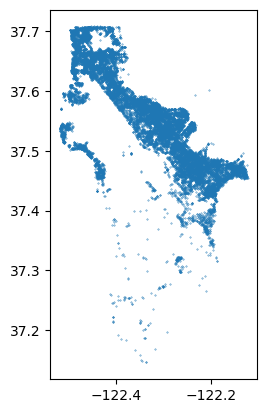

In [5]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,geometry,bridge,junction,access,tunnel
0,281266,702274215,0,24054675,True,5,US 101,Bayshore Freeway,motorway,65 mph,False,1327.761,"LINESTRING (-122.30258 37.56018, -122.30222 37...",NaN,NaN,NaN,NaN
1,281266,65358141,0,"[512386104, 8920615]",True,3,NaN,NaN,motorway_link,65 mph,False,321.476,"LINESTRING (-122.30258 37.56018, -122.30161 37...",NaN,NaN,NaN,NaN
2,26028129,65388878,0,"[385243928, 392651465, 679545026, 8924237]",True,"[2, 1, 4, 3]",NaN,NaN,motorway_link,45 mph,False,377.868,"LINESTRING (-122.17735 37.48195, -122.17752 37...",NaN,NaN,NaN,NaN
3,26028129,26028133,0,395436903,True,4,US 101,Bayshore Freeway,motorway,65 mph,False,317.315,"LINESTRING (-122.17735 37.48195, -122.17744 37...",NaN,NaN,NaN,NaN
4,26028133,26029745,0,395436903,True,4,US 101,Bayshore Freeway,motorway,65 mph,False,351.773,"LINESTRING (-122.18047 37.48336, -122.18184 37...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46694,11121306952,11121306951,0,1198865176,False,NaN,NaN,Crape Court,residential,NaN,False,21.056,"LINESTRING (-122.41260 37.70141, -122.41238 37...",NaN,NaN,NaN,NaN
46695,11121306953,11121306954,0,1198865174,False,NaN,NaN,Coastal Court,residential,NaN,False,36.050,"LINESTRING (-122.41318 37.70109, -122.41279 37...",NaN,NaN,NaN,NaN
46696,11121306954,7522159159,0,804208374,False,NaN,NaN,Martin Street,residential,NaN,False,27.675,"LINESTRING (-122.41279 37.70099, -122.41268 37...",NaN,NaN,NaN,NaN
46697,11121306954,11121306953,0,1198865174,False,NaN,NaN,Coastal Court,residential,NaN,True,36.050,"LINESTRING (-122.41279 37.70099, -122.41318 37...",NaN,NaN,NaN,NaN


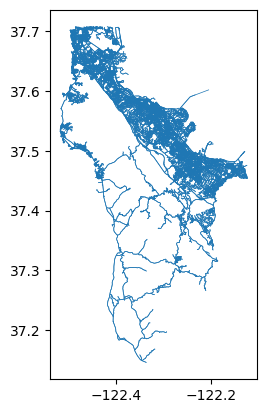

In [6]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

In [7]:
# First, define Cypher queries to create constraints and indexes

constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

rel_index_query = "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"

address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE a.id IS UNIQUE"

point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

# Cypher query to import our road network nodes GeoDataFrame

node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location = 
         point({latitude: row.y, longitude: row.x }),
            i.ref = row.ref,
            i.highway = row.highway,
            i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
    '''

# Cypher query to import our road network relationships GeoDataFrame

rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
    '''

In [8]:
# Function to execute our constraint / index queries

def create_constraints(tx):
    results = tx.run(constraint_query)
    results = tx.run(rel_index_query)
    results = tx.run(address_constraint_query)
    results = tx.run(point_index_query)

In [9]:
# Function to batch our GeoDataFrames

def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0
    
    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')}).data()
        print(results)
        total += results[0]['total']
        batch += 1

In [13]:
# Run our constraints queries and nodes GeoDataFrame import

with driver.session() as session:
    session.execute_write(create_constraints)
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=['geometry'])) #FIXME: handle geome

[{'total': 10000}]
[{'total': 8481}]


In [14]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handl

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 6699}]


### Adding Addresses
We can use data from OpenAddresses.io to add addresses to our road network so that we can find routes between addresses.

<img src="../../img/data_model_addresses.png" width="1000" height="1000">


    Data from OpenAddresses is GeoJSON that looks like this:

    {
      "type":"Feature",
      "properties":
        {
          "hash":"a98a4da3fa36d965",
          "number":"599",
          "street":"SKYLINE BLVD",
          "unit":"",
          "city":"DALY CITY",
          "district":"",
          "region":"",
          "postcode":" ",
          "id":"002011020"
        },
      "geometry":
        { "type":"Point",
          "coordinates":[-122.4995656,37.7033098]
        }
    }


In [109]:
# We'll use apoc.load.json to import a JSON file of address data

add_addresses_query = """
CALL apoc.periodic.iterate(
  'CALL apoc.load.json("https://cdn.neo4jlabs.com/data/addresses/san_mateo.geojson") YIELD value',
  'MERGE (a:Address {id: value.properties.id})
SET a.location = 
  point(
      {latitude: value.geometry.coordinates[1], longitude: value.geometry.coordinates[0]}),
    a.full_address = value.properties.number + " " + value.properties.street + " " + value.properties.city + ", CA " + value.properties.postcode

SET a += value.properties',
  {batchSize:10000, parallel:true})
"""

# Next, connect each address to the road network at the nearest intersection

near_intersection_query = """
CALL apoc.periodic.iterate(
  'MATCH (p:Address) WHERE NOT EXISTS ((p)-[:NEAREST_INTERSECTION]->(:Intersection)) RETURN p',
  'CALL {
  WITH p
  MATCH (i:Intersection)
  USING INDEX i:Intersection(location)
  WHERE point.distance(i.location, p.location) < 200

  WITH i
  ORDER BY point.distance(p.location, i.location) ASC 
  LIMIT 1
  RETURN i
}
WITH p, i

MERGE (p)-[r:NEAREST_INTERSECTION]->(i)
SET r.length = point.distance(p.location, i.location)
RETURN COUNT(p)',
  {batchSize:1000, parallel:false})
"""

# Create a full text index to enable search in our web app

full_text_query = "CREATE FULLTEXT INDEX search_index IF NOT EXISTS FOR (p:PointOfInterest|Address) ON EACH [p.name, p.full_address]"


In [110]:
# Transaction function to execute our address import queries

def enrich_addresses(tx):
    results = tx.run(add_addresses_query)        
    results = tx.run(near_intersection_query)

In [111]:
# Execute address import
with driver.session() as session:
    session.execute_write(enrich_addresses)

#### cypher dans neo4j où poi_start= POI de départ, et poi_arrival = POI d'arrivée

    MATCH (poi_start:Address)-[:NEAREST_INTERSECTION]->(source:Intersection)
    WHERE poi_start.full_address CONTAINS "410 E 5TH AVE SAN MATEO, CA"
    MATCH 
      (poi_arrival:Address)-[:NEAREST_INTERSECTION]->(dest:Intersection) 
    WHERE poi_arrival.full_address CONTAINS "111 5TH AVE"
    CALL apoc.algo.dijkstra(source, dest, "ROAD_SEGMENT", "length") 
    YIELD weight, path
    RETURN *

![route caluclation Dijkstra](../../img/route_dijkstra.png)

    MATCH (poi_start:Address)-[:NEAREST_INTERSECTION]->(source:Intersection)
    WHERE poi_start.full_address CONTAINS "410 E 5TH AVE SAN MATEO, CA"
    MATCH 
    (poi_arrival:Address)-[:NEAREST_INTERSECTION]->(dest:Intersection) 
    WHERE poi_arrival.full_address CONTAINS "111 5TH AVE"
    CALL apoc.algo.dijkstra(source, dest, "ROAD_SEGMENT", "length") 
    YIELD weight, path
    WITH [ x in nodes(path) | {latitude: x.location.latitude, longitude: x.location.longitude}] AS route, weight AS totalDist
    RETURN *

![route longitude latitude](../../img/route_long_lat.png)

##### A investiguer
    
    CALL db.index.fulltext.queryNodes("search_index", $searchString) 
    YIELD node, score
    RETURN coalesce(node.name, node.full_address) AS value, score, labels(node)[0] AS label, node.id AS id
    ORDER BY score DESC LIMIT 25
    MATCH (to {id: $dest})-[:NEAREST_INTERSECTION]->(source:Intersection) 
    MATCH (from {id: $source})-[:NEAREST_INTERSECTION]->(target:Intersection)
    CALL apoc.algo.dijkstra(source, target, 'ROAD_SEGMENT', 'length')
    YIELD path, weight
    RETURN [n in nodes(path) | [n.location.latitude, n.location.longitude]] AS route